# Ore gold

# Contents<a id='back'></a>

* [Introducción](#intro)
* [Inicialización](#inicializacion)
* [Cargando los datos](#cargando_los_datos)
* [Explorando los datos](#explorando_datos_iniciales)
* [Análisis de datos](#analisis_de_datos)
* [Estudiar parámetros principales](#estudiar_parámetros_principales)
* [Modelos de entrenamiento](#modelos_de_entrenamiento)
* [Conclusión general](#end)

## Introducción <a id='intro'></a>
**Propósito del proyecto**
    
   - Predecir la cantidad de mineral de oro extraído.

### Objetivos:
1. - Encontrar el EAM entre recovery y recovery_rougher;
2. - Analizar los datos sumistrados por Zyfra;
3. - Entrenar modelos de ML que prediga la cantidad de mineral de oro extraído.

[Volver a Contenidos](#back)

## Inicialización <a id='inicializacion'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import seaborn as sns

[Volver a Contenidos](#back)

## Cargando los datos <a id='cargando_los_datos'></a>

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')

In [3]:
#posibles características no presentes en el DF
#sin objetivos
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [4]:
#conjuntos de entrenamiento y prueba con todas las características
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

## Explorando los datos <a id='explorando_datos_iniciales'></a>

**Descripción de datos**

In [5]:
df_train.shape

(16860, 87)

In [6]:
df_test.shape

(5856, 53)

In [7]:
df_full.shape

(22716, 87)

In [8]:
# Imprimiendo la información general/resumen sobre el DataFrame de los planes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [9]:
# Imprimiendo la información general/resumen sobre el DataFrame de los planes
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [10]:
# Imprimiendo la información general/resumen sobre el DataFrame de los planes
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [11]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [12]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [13]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [14]:
# Imprime una muestra de los datos para los planes
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [15]:
# Imprime una muestra de los datos para los planes
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [16]:
# Imprime una muestra de los datos para los planes
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


**Valores ausentes**

In [17]:
df_train.isna().sum().sort_values(ascending=False)

rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_sol                               2249
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_sol                     1986
                                                      ... 
primary_cleaner.state.floatbank8_d_level                27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
primary_cleaner.input.feed_size                          0
date                                                     0
Length: 87, dtype: int64

In [18]:
df_test.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            353
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.input.xanthate                166
rougher.input.floatbank10_xanthate            123
rougher.input.feed_sol                         67
rougher.input.floatbank11_sulfate              55
rougher.input.feed_rate                        40
secondary_cleaner.state.floatbank3_a_air       34
secondary_cleaner.state.floatbank2_b_air       23
rougher.input.feed_size                        22
secondary_cleaner.state.floatbank2_a_air       20
rougher.state.floatbank10_a_air                17
rougher.state.floatbank10_c_air                17
rougher.state.floatbank10_d_air                17
rougher.state.floatbank10_e_air                17
rougher.state.floatbank10_b_air                17
rougher.state.floatbank10_f_air                17
secondary_cleaner.state.floatbank3_a_level     16


In [19]:
df_full.isna().sum().sort_values(ascending=False)

rougher.output.recovery                     3119
rougher.output.tail_ag                      2737
rougher.output.tail_au                      2736
rougher.output.tail_sol                     2736
rougher.input.floatbank11_xanthate          2257
                                            ... 
primary_cleaner.state.floatbank8_b_level      43
primary_cleaner.state.floatbank8_c_level      43
primary_cleaner.state.floatbank8_d_level      43
primary_cleaner.input.feed_size                0
date                                           0
Length: 87, dtype: int64

**Valores duplicados**

In [20]:
len(df_train.drop_duplicates()) == len (df_train)

True

In [21]:
len(df_test.drop_duplicates()) == len (df_test)

True

In [22]:
len(df_full.drop_duplicates()) == len (df_full)

True

**Conclusión intermedia**
 - El DataFrame **df_train** tiene 18.860 filas y 87 columnas; **df_test** tiene 5.856 filas y 53 columnas, y **df_full** tiene 22.716 filas y 87 columnas. Con valores ausentes, y sin valores duplicados.

[Volver a Contenidos](#back)

## Análisis de datos <a id='analisis_de_datos'></a>

### Cálculo de la recuperación del mineral <a id='explorando_datos_iniciales'></a>

In [23]:
#Calculando la recuperación mediante el conjunto de entrenamiento

# Rougher:
Cr = df_train["rougher.output.concentrate_au"]
Fr = df_train["rougher.input.feed_au"]
Tr = df_train["rougher.output.tail_au"]

In [24]:
#¿Cómo agregar este valor al DF?
recovery = Cr * (Fr - Tr) / (Fr * (Cr - Tr)) * 100
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

In [25]:
list_recovery = recovery.tolist()

In [26]:
#Recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento
recovery_rougher = df_train["rougher.output.recovery"]
recovery_rougher

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 16860, dtype: float64

In [27]:
list_recovery_rougher = recovery_rougher.tolist()

### EAM entre recovery y recovery_rougher

In [29]:
def mae(valores, prediction):
    return np.nanmean(np.abs(np.subtract(valores, prediction)))

In [30]:
#Llamada a la funcion MAE 
mae(list_recovery_rougher, list_recovery)

9.303415616264301e-15

### Características no disponibles en el conjunto de prueba <a id='explorando_datos_iniciales'></a>

In [31]:
# Parámetros no disponibles en el conjunto de prueba
not_available_columns = set(df_train.columns) - set(df_test.columns)

# Parámetros disponibles en el conjunto de prueba
available_columns = [f for f in df_train.columns if f not in not_available_columns]
# toma todas las f por cada f que este en df_train.columns solamente sin f no esta en not_avaialable_columns

train_df_available_features = df_train[available_columns]
train_df_not_available_columns = df_train[not_available_columns]

In [32]:
#DType
train_df_not_available_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.output.concentrate_sol              16224 non-null  float64
 1   final.output.tail_pb                                16677 non-null  float64
 2   rougher.output.tail_ag                              14610 non-null  float64
 3   rougher.output.concentrate_sol                      16698 non-null  float64
 4   secondary_cleaner.output.tail_ag                    16776 non-null  float64
 5   rougher.output.concentrate_pb                       16778 non-null  float64
 6   rougher.output.tail_sol                             14611 non-null  float64
 7   secondary_cleaner.output.tail_pb                    16764 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


### Preprocesamiento de datos

#### Uniendo los DataFrame df_full y df_test

In [33]:
# Filtrando df_full
df_full_new= df_full[["date", "rougher.output.recovery", "final.output.recovery"]]

In [34]:
# Uniendo df_test con df_full_new
df_merged = pd.merge(df_full_new, df_test, on="date", how="right")

#### Uniendo los DataFrame train_df_available_features y df_train_

In [35]:
#target = ["rougher.output.recovery", "final.output.recovery"]
df_train_ = df_train[["date", "rougher.output.recovery", "final.output.recovery"]]

In [36]:
# Uniendo train_df_available_features con df_full_new
df_merged_1 = pd.merge(train_df_available_features, df_train_, on="date", how="right")

#### Tratar los valores ausentes

**Valores ausentes rougher.output.concentrate_au**

In [37]:
df_train.fillna(method="ffill", inplace=True)

In [38]:
df_test.fillna(method="ffill", inplace=True)

In [39]:
df_full.fillna(method="ffill", inplace=True)

In [40]:
df_merged.fillna(method="ffill", inplace=True)

In [41]:
df_merged_1.fillna(method="ffill", inplace=True)

## Estudiar parámetros principales <a id='estudiar_parámetros_principales'></a> 

### Concentración de metales  (Au, Ag, Pb)

Cambio en la concentración de metales (Au (oro), Ag(plata), Pb(plomo)) en función de la etapa de purificación

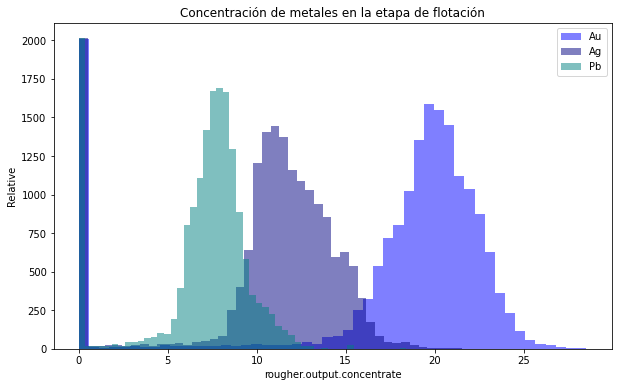

In [42]:
# Concentración de metales (Au (oro), Ag(plata), Pb(plomo)) en función de la etapa de purificación
df_train["rougher.output.concentrate_au"].plot(kind="hist", bins=50, alpha=0.5, label="Au", figsize=(10, 6), color="blue")
df_train["rougher.output.concentrate_ag"].plot(kind="hist", bins=50, alpha=0.5, label="Ag", figsize=(10, 6), color="navy")
df_train["rougher.output.concentrate_pb"].plot(kind="hist", bins=50, alpha=0.5, label="Pb", figsize=(10, 6), color="teal")

plt.legend()

plt.title(f"Concentración de metales en la etapa de flotación")
plt.ylabel(f"Relative")
plt.xlabel(f"rougher.output.concentrate")

plt.show()

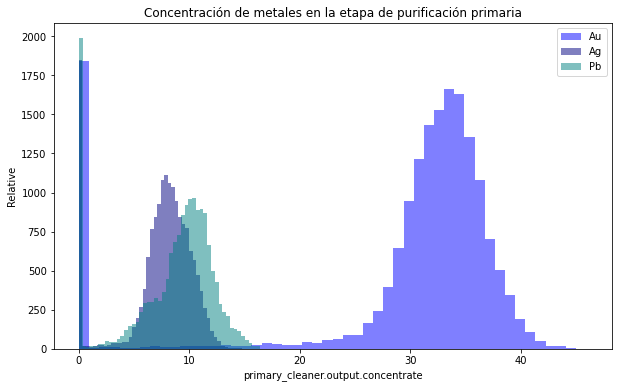

In [43]:
df_train["primary_cleaner.output.concentrate_au"].plot(kind="hist", bins=50, alpha=0.5, label="Au", figsize=(10, 6), color="blue")
df_train["primary_cleaner.output.concentrate_ag"].plot(kind="hist", bins=50, alpha=0.5, label="Ag", figsize=(10, 6), color="navy")
df_train["primary_cleaner.output.concentrate_pb"].plot(kind="hist", bins=50, alpha=0.5, label="Pb", figsize=(10, 6), color="teal")

plt.legend()

plt.title(f"Concentración de metales en la etapa de purificación primaria")
plt.ylabel(f"Relative")
plt.xlabel(f"primary_cleaner.output.concentrate")

plt.show()

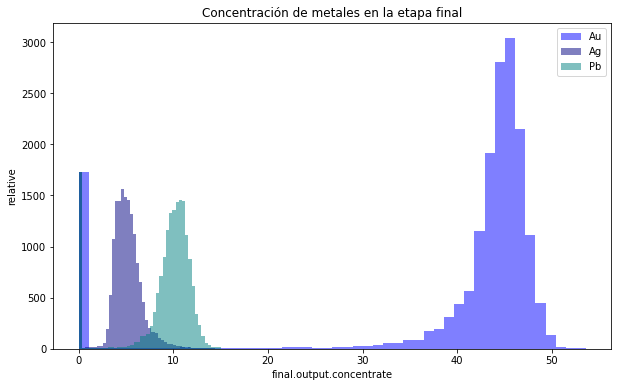

In [44]:
df_train["final.output.concentrate_au"].plot(kind="hist", bins=50, alpha=0.5, label="Au", figsize=(10, 6), color="blue")
df_train["final.output.concentrate_ag"].plot(kind="hist", bins=50, alpha=0.5, label="Ag", figsize=(10, 6), color="navy")
df_train["final.output.concentrate_pb"].plot(kind="hist", bins=50, alpha=0.5, label="Pb", figsize=(10, 6), color="teal")
plt.legend()

plt.title(f"Concentración de metales en la etapa final")
plt.ylabel(f"relative")
plt.xlabel(f"final.output.concentrate")

plt.show()

**Conclusión intermedia**

- `'Gráfico Concentración de metales en la etapa de flotación'` — se puede evidenciar que los tres metales tienen similar frecuencia; sin embargo, sus concentraciones varían. La concentración del plomo está entre el rango 6-8, la concentración del plata está entre el rango 10-14.5 y la concentración del oro está entre el rango 19-23, aproximadamente.


- `'Gráfico Concentración de metales en la etapa de purificación primaria'` — se puede evidenciar que los metales plata y plomo tienen similar frecuencia respecto al oro. La concentración del plomo está entre el rango 9-12, la concentración del plata está entre el rango 6-10 y la concentración del oro está entre el rango 30.5-36, aproximadamente.


- `'Gráfico Concentración de metales en la etapa final'` — se puede evidenciar que los metales plata y plomo tienen similar frecuencia respecto al oro. La concentración del plomo está entre el rango 9-11, la concentración del plata está entre el rango 4-5 y la concentración del oro está entre el rango 43-47, aproximadamente.


En resumen, en cada etapa (flotación, etapa de purificación 1 y etapa de purificación 2), se evidencia que el oro tiene mayor concentración, respecto a los otros dos metales.

[Volver a Contenidos](#back)

### Distribución del tamaño de las partículas de la alimentación

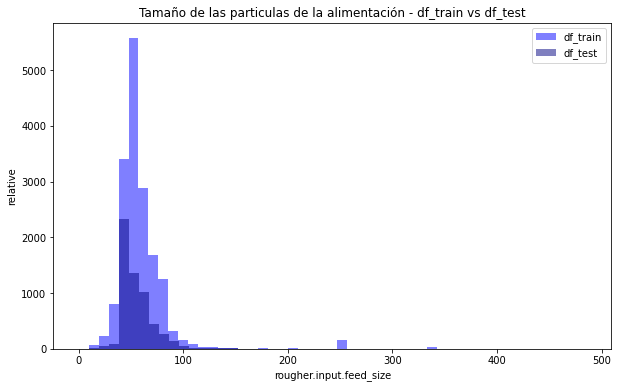

In [45]:
# Compara las distribuciones del tamaño de las partículas de la alimentación
df_train["rougher.input.feed_size"].plot(kind="hist", bins=50, alpha=0.5, label="df_train", figsize=(10, 6), color="blue")
df_test["rougher.input.feed_size"].plot(kind="hist", bins=50, alpha=0.5, label="df_test", figsize=(10, 6), color="navy")
plt.legend()

plt.title(f"Tamaño de las particulas de la alimentación - df_train vs df_test")
plt.ylabel(f"relative")
plt.xlabel(f"rougher.input.feed_size")

plt.show()

**Conclusión intermedia**

- `'Gráfico Tamaño de las particulas de la alimentación'` — las frecuencia entre el tamaño de las particulas de df_train vs df_test difieren. Y el tamaño de particula de df_train esta entre 45-60 y en df_test entre 40-70.

[Volver a Contenidos](#back)

### Concentraciones totales de las sustancias

In [46]:
#Concentraciones totales / Rougher feed — materia prima
df_train["rougher_feed"] = df_train[["rougher.input.feed_ag", "rougher.input.feed_pb", "rougher.input.feed_rate", "rougher.input.feed_size", "rougher.input.feed_sol", "rougher.input.feed_au"]].sum(axis=1)

#Concentraciones totales / Rougher — concentrado rougher
df_train["rougher_concentrate"] = df_train[["rougher.output.concentrate_ag", "rougher.output.concentrate_pb", "rougher.output.concentrate_sol", "rougher.output.concentrate_au"]].sum(axis=1)

#Concentraciones totales / Final — concentrado final
df_train["final_concentrate"] = df_train[["final.output.concentrate_ag", "final.output.concentrate_pb", "final.output.concentrate_sol", "final.output.concentrate_au"]].sum(axis=1)

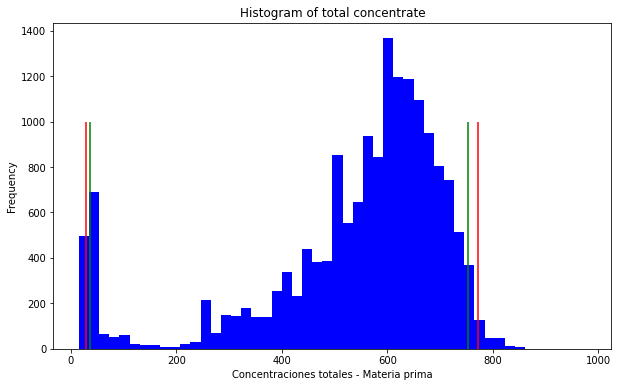

In [47]:
# Concentrado mínimo
df_train_min_mll_mp = df_train['rougher_feed'].quantile(q=0.01)
df_train_min_ll_mp = df_train['rougher_feed'].quantile(q=0.03)

# Concentrado máximo
df_train_max_ll_mp = df_train['rougher_feed'].quantile(q=0.97)
df_train_max_mll_mp = df_train['rougher_feed'].quantile(q=0.99)

#Histograma de concentración total - Materia prima
df_train['rougher_feed'].plot(kind="hist", bins=50, title= f"Histogram of total concentrate", figsize=(10, 6), color="blue")
plt.vlines(x=[df_train_min_mll_mp, df_train_max_mll_mp], ymin= 0, ymax=1000, colors="red")
plt.vlines(x=[df_train_min_ll_mp, df_train_max_ll_mp], ymin= 0, ymax=1000, colors="green")

plt.xlabel(f"Concentraciones totales - Materia prima")
plt.show()

In [48]:
df_train_min_mll_mp

28.42879063789049

In [49]:
df_train_max_mll_mp

772.6883189523766

In [50]:
outlier_range_RF = (df_train['rougher_feed'].quantile(0.01), df_train['rougher_feed'].quantile(0.99))
df_RF = df_train.loc[(df_train['rougher_feed'] >= outlier_range_RF[0]) & (df_train['rougher_feed'] <= outlier_range_RF[1])]
len(df_RF) / len(df_train)

0.9799525504151839

**Conclusión intermedia**

- `'Gráfico Concentraciones totales - Materia prima'` — se evidencia que la mayor concentración de la materia prima está entre 580 y 700. El concetrado mínimo es de 28.43 y el máximo de 772.69. Teniendo un sesgo hacia la izquierda.

[Volver a Contenidos](#back)

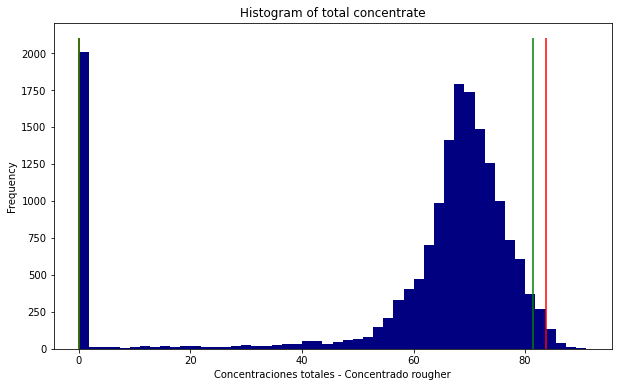

In [51]:
# Concentrado mínimo
df_train_min_mll_cr = df_train['rougher_concentrate'].quantile(q=0.01)
df_train_min_ll_cr = df_train['rougher_concentrate'].quantile(q=0.03)

# Concentrado máximo
df_train_max_ll_cr = df_train['rougher_concentrate'].quantile(q=0.97)
df_train_max_mll_cr = df_train['rougher_concentrate'].quantile(q=0.99)

#Histograma de concenytración total - concentrado rougher
df_train['rougher_concentrate'].plot(kind="hist", bins=50, title= f"Histogram of total concentrate", figsize=(10, 6), color="navy")
plt.vlines(x=[df_train_min_mll_cr, df_train_max_mll_cr], ymin= 0, ymax=2100, colors="red")
plt.vlines(x=[df_train_min_ll_cr, df_train_max_ll_cr], ymin= 0, ymax=2100, colors="green")

plt.xlabel(f"Concentraciones totales - Concentrado rougher")
plt.show()

In [52]:
df_train_min_mll_cr

0.0

In [53]:
df_train_max_mll_cr

83.8033308178481

In [54]:
outlier_range_RC = (df_train['rougher_concentrate'].quantile(0.01), df_train['rougher_concentrate'].quantile(0.99))
df_RC = df_train.loc[(df_train['rougher_concentrate'] >= outlier_range_RC[0]) & (df_train['rougher_concentrate'] <= outlier_range_RC[1])]
len(df_RC) / len(df_train)

0.9899762752075919

**Conclusión intermedia**

- `'Gráfico Tamaño de las particulas de la alimentación'` — se evidencia que la mayor concentración del concentrado rougher está entre 65 y 75. El concetrado mínimo es de 0 y el máximo de 83.80. Teniendo un sesgo hacia la izquierda.

[Volver a Contenidos](#back)

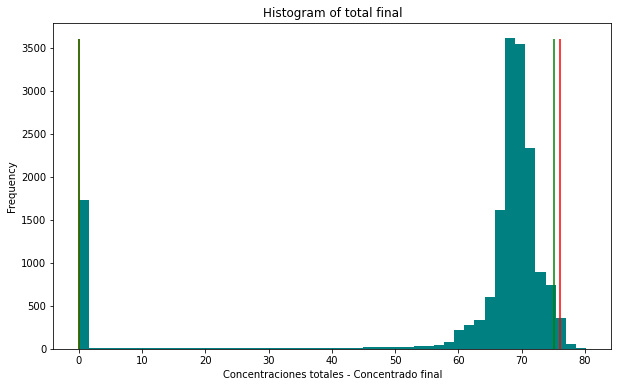

In [55]:
# Concentrado mínimo
df_train_min_mll_cf = df_train['final_concentrate'].quantile(q=0.01)
df_train_min_ll_cf = df_train['final_concentrate'].quantile(q=0.03)

# Concentrado máximo
df_train_max_ll_cf = df_train['final_concentrate'].quantile(q=0.97)
df_train_max_mll_cf = df_train['final_concentrate'].quantile(q=0.99)

#Histograma de concenytración total - concentrado rougher
df_train['final_concentrate'].plot(kind="hist", bins=50, title= f"Histogram of total final", figsize=(10, 6), color="teal")
plt.vlines(x=[df_train_min_mll_cf, df_train_max_mll_cf], ymin= 0, ymax=3600, colors="red")
plt.vlines(x=[df_train_min_ll_cf, df_train_max_ll_cf], ymin= 0, ymax=3600, colors="green")

plt.xlabel(f"Concentraciones totales - Concentrado final")
plt.show()

In [56]:
df_train_min_mll_cf

0.0

In [57]:
df_train_max_mll_cf

76.10972587997676

In [58]:
outlier_range_FC = (df_train['final_concentrate'].quantile(0.01), df_train['final_concentrate'].quantile(0.99))
df_FC = df_train.loc[(df_train['final_concentrate'] >= outlier_range_FC[0]) & (df_train['final_concentrate'] <= outlier_range_FC[1])]
len(df_FC) / len(df_train)

0.9899762752075919

**Conclusión intermedia**

- `'Gráfico Tamaño de las particulas de la alimentación'` — se evidencia que la mayor concentración del concentrado final está entre 68 y 72. El concetrado mínimo es de 0 y el máximo de 76.10. Teniendo un sesgo hacia la izquierda.

[Volver a Contenidos](#back)

## **Modelos de entrenamiento**  <a id='modelos_de_entrenamiento'></a>

In [59]:
df_merged_ = df_merged.drop(['date'], axis=1)

In [60]:
df_merged_1_ =df_merged_1.drop(['date'], axis=1)

In [61]:
def eliminar_outliers(df, umbral):
    for columna in df.columns:
        tipo_de_datos = df[columna].dtype
        if not pd.api.types.is_numeric_dtype(tipo_de_datos):
            df[columna] = df[columna].astype("float")
        limites = calcular_limites_por_iqr(df, columna, umbral)
        df = df.loc[(df[columna] >= limites[0]) & (df[columna] <= limites[1])]
    return df

def calcular_limites_por_iqr(df, columna, umbral):
    q1, q3 = df[columna].quantile([0.03, 0.97])
    iqr = q3 - q1
    limites = (q1 - umbral * iqr, q3 + umbral * iqr)
    return limites

In [62]:
df_merged_1 = eliminar_outliers(df_merged_, 2)

In [63]:
df_merged_1 = df_merged_1.loc[(df_merged_1["rougher.output.recovery"] >= 1) & (df_merged_1["final.output.recovery"] >= 1)]

In [64]:
df_merged_1["final.output.recovery"].min()

2.0309166797817286

In [65]:
df_merged_1["rougher.output.recovery"].min()

6.7054382854267525

In [66]:
df_merged_2 = eliminar_outliers(df_merged_1_, 2)

In [67]:
df_merged_2 = df_merged_2.loc[(df_merged_2["rougher.output.recovery"] >= 1) & (df_merged_2["final.output.recovery"] >= 1)]

In [68]:
df_merged_2["rougher.output.recovery"].min()

1.0757503319072024

In [69]:
df_merged_2["final.output.recovery"].min()

1.5002838794149769

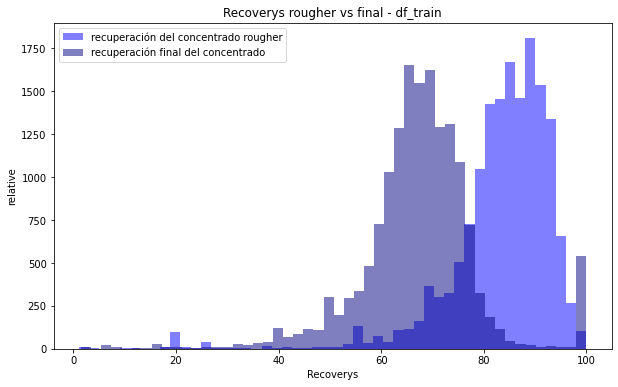

In [70]:
df_merged_2["rougher.output.recovery"].plot(kind="hist", bins=50, alpha=0.5, label="recuperación del concentrado rougher", figsize=(10, 6), color="blue")
df_merged_2["final.output.recovery"].plot(kind="hist", bins=50, alpha=0.5, label="recuperación final del concentrado", figsize=(10, 6), color="navy")
plt.legend()

plt.title(f"Recoverys rougher vs final - df_train")
plt.ylabel(f"relative")
plt.xlabel(f"Recoverys")

plt.show()

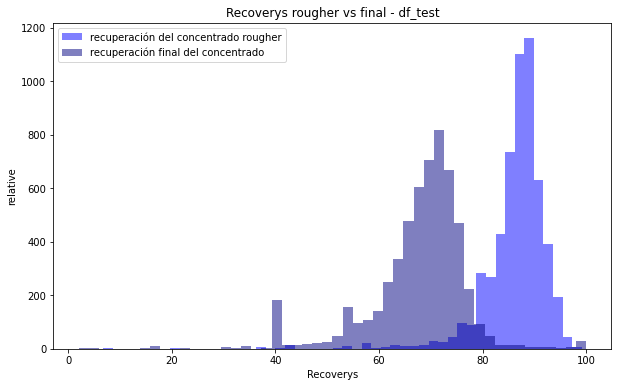

In [71]:
df_merged_1["rougher.output.recovery"].plot(kind="hist", bins=50, alpha=0.5, label="recuperación del concentrado rougher", figsize=(10, 6), color="blue")
df_merged_1["final.output.recovery"].plot(kind="hist", bins=50, alpha=0.5, label="recuperación final del concentrado", figsize=(10, 6), color="navy")
plt.legend()

plt.title((f"Recoverys rougher vs final - df_test"))
plt.ylabel(f"relative")
plt.xlabel(f"Recoverys")

plt.show()

In [72]:
# Features train
#feautures = list(available_columns)
X_train = df_merged_2.drop(["rougher.output.recovery", "final.output.recovery"], axis=1)
X_train

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,-500.888152,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,-399.363624,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,-401.195834,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,98.880538,7.984164,6.50,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [73]:
# Targets
#target = ["rougher.output.recovery", "final.output.recovery"]
y_train = df_merged_2[["rougher.output.recovery", "final.output.recovery"]]
y_train

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
16855,89.574376,73.755150
16856,87.724007,69.049291
16857,88.890579,67.002189
16858,89.858126,65.523246


In [74]:
# Features test
X_test = df_merged_1.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
X_test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,-487.479567,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [75]:
# Targets test
y_test = df_merged_1[["rougher.output.recovery", "final.output.recovery"]]
y_test

,rougher.output.recovery,final.output.recovery
0,89.993421,70.273583
1,88.089657,68.910432
2,88.412756,68.143213
3,87.360133,67.776393
4,83.236367,61.467078
...,...,...
5851,95.172585,68.919891
5852,94.575036,68.440582
5853,93.018138,67.092759
5854,92.599042,68.061186


### sMAPE & sMAPE final

In [76]:
# Función para calcular el valor final de sMAPE
#y = variable objetivo
def smape_(y, y_pred):

  n = len(y)
  abs_y = abs(y)
  abs_y_pred = abs(y_pred)
  abs_diff = abs(y - y_pred)

  return 100*(2/n) * np.nansum(abs_diff / (abs_y + abs_y_pred))

In [77]:
def smape_final(y, y_pred): #percentual error

  pred_target_1 = y_pred[:, 0]
  pred_target_2 = y_pred[:, 1]

  rougher_smape = smape_(y.iloc[:, 0], pred_target_1)
  final_smape = smape_(y.iloc[:, 1], pred_target_2)

  return 0.25*rougher_smape + 0.75*final_smape

In [78]:
# Validación cruzada
smape_scorer = make_scorer(smape_final, greater_is_better=False)

In [79]:
#evaluación del rendimiento del modelo
random_state = 200
model = RandomForestRegressor(random_state=random_state)
final_score = cross_val_score(model, X_train, y_train, cv=3).mean()
abs(final_score)

0.17605003663488408

In [80]:
#evaluación del rendimiento del modelo
random_state = 200
model = DecisionTreeRegressor(random_state=random_state)
final_score = cross_val_score(model, X_train, y_train, cv=3).mean()
abs(final_score)

1.450217122051269

In [85]:
#Encontrando los mejores valores de los parámetros n_estimators y max_depth

param_grid = {
    "max_depth": [5, 6, 7, 8],
    "n_estimators": [10, 25, 50, 100]
}

model = RandomForestRegressor()
gs_RF = GridSearchCV(model, param_grid, cv=3, scoring=smape_scorer)
gs_RF.fit(X_train, y_train)
best_params_ = gs_RF.best_params_
best_params_

{'max_depth': 7, 'n_estimators': 25}

In [82]:
#Encontrando los mejores valores de los parámetros n_estimators y max_depth

param_grid_RT = {
    "max_depth": [5, 6, 7, 8]
}

model_RT = DecisionTreeRegressor()
gs_RT = GridSearchCV(model_RT, param_grid_RT, cv=3, scoring=smape_scorer)
gs_RT.fit(X_train, y_train)
best_params_RT = gs_RT.best_params_
best_params_RT

{'max_depth': 5}

In [83]:
predict_RF = gs_RF.predict(X_test)
print(smape_final(y_test, predict_RF))

9.143407179080357


In [84]:
predict_RT = gs_RT.predict(X_test)
print(smape_final(y_test, predict_RT))

10.947052256078962


## Conclusión general <a id='end'></a>

Para la realización del proyecto se tenían tres datasets *df_train*, *df_test* y *df_full*, se exploraron sus datos, se calculó el EAM entre recovery y recovery_rougher,  vimos que características de df_train no estaban en df_test, se creó el DataFrame df_merged con df_train y algunas características de df_full, y por último se trataron lo valores ausentes, con el método ffill.

Con gráficos de distribución se pudo ver el cambio en la concentración de metales (Au (oro), Ag(plata), Pb(plomo)) en función de la etapa de purificación, la distribución del tamaño de las partículas de la alimentación y Concentraciones totales de las sustancias.

Por último, se entrenaron dos modelos, Random Forest Regressor y Decision Tree Regressor, utilizando el error medio absoluto porcentual simétrico(sMAPE), se encontraron los mejores valores de los parámetros n_estimators y max_depth y la predicción de cada modelo; el cuál, por los resultados obtenidos, se escoge el modelo Decision Tree Regressor ya que la cantidad de oro extraído del mineral de oro es mayor.